<a href="https://colab.research.google.com/github/EngMdarwish/Data-Science--training/blob/main/Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the relevant libraries


In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
url='https://drive.google.com/file/d/1qINeuIJ6PT6qz0f7xxs-e97qVHgbksD_/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
data_raw= pd.read_csv(dwn_url)

In [4]:
data_raw.describe(include='all') #include categorical variables

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


as we see model is categorical variable and has 312 unique values so its hard to implement at regression because we will have more than 300 dummies

In [5]:
data=data_raw.drop(['Model'],axis=1)# delete model column
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Check missing values

In [6]:
mv=data.isnull().sum()
mv

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

as we see price and engineV have missing values 
we need to remove this records 
if you are removing <5% of observations ,you are free to just remove all that have missing values

In [7]:
n=data.shape[0]
price_mv=mv['Price']
engineV_mv=mv['EngineV']
price_mv_prect=((price_mv)/n)*100
engineV_mv_prect=((engineV_mv)/n)*100
print(price_mv_prect)
print(engineV_mv_prect)

3.958573072497123
3.452243958573072


we are free to remove missing values

In [8]:
data_no_ms=data.dropna(axis=0)
data_no_ms.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


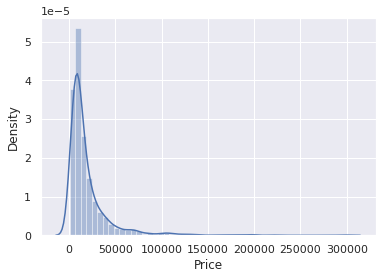

In [9]:
sns.distplot(data_no_ms['Price'])

as we saw from describtive there are outliers on prices
we can remove 1% by qunatile function 

In [10]:
q=data_no_ms['Price'].quantile(0.99)
q

129812.51999999981

In [11]:
data_1=data_no_ms[data_no_ms['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


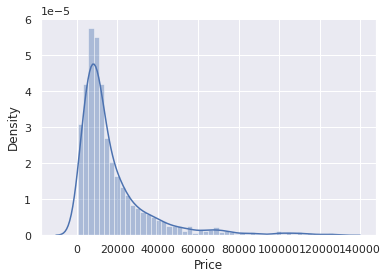

In [12]:
sns.distplot(data_1['Price'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


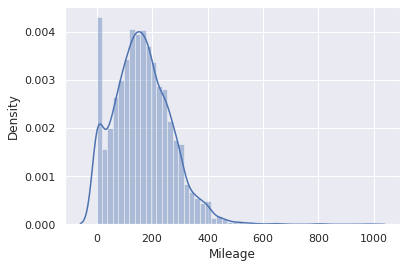

In [13]:
sns.distplot(data_1['Mileage'])

In [14]:
q=data_1['Mileage'].quantile(0.99)
data_2=data_1[data_1['Mileage']<q]

In [15]:
data_2.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


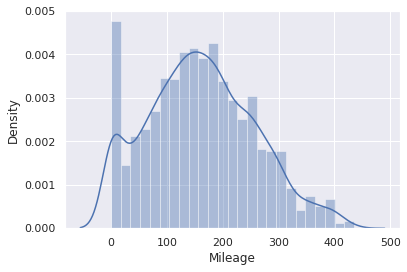

In [16]:
sns.distplot(data_2['Mileage'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


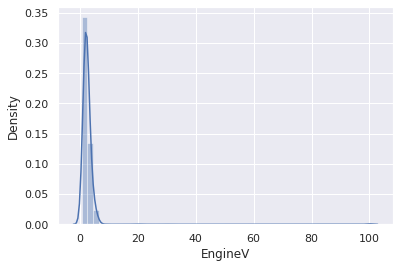

In [17]:
sns.distplot(data_2['EngineV'])

by default engineV values  0.6 to 6.5 




In [18]:
data_2[data_2['EngineV']>6.5]


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
256,Mercedes-Benz,5500.0,sedan,100,99.99,Petrol,yes,2007
538,Audi,1950.0,sedan,320,19.00,Other,no,1996
630,Renault,4800.0,van,113,15.00,Diesel,yes,2006
930,BMW,6800.0,crossover,242,99.99,Diesel,no,2005
1189,BMW,25000.0,crossover,150,30.00,Petrol,yes,2007
1203,BMW,3300.0,sedan,233,28.00,Petrol,no,1997
1264,BMW,3000.0,sedan,350,99.99,Other,yes,1992
1269,Renault,2750.0,hatch,186,22.00,Diesel,no,2005
1311,Volkswagen,4800.0,sedan,190,99.99,Petrol,yes,1998
1431,Mercedes-Benz,6500.0,sedan,215,55.00,Petrol,no,2001


In [19]:
data_3=data_2[data_2['EngineV']<6.5]

In [20]:
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


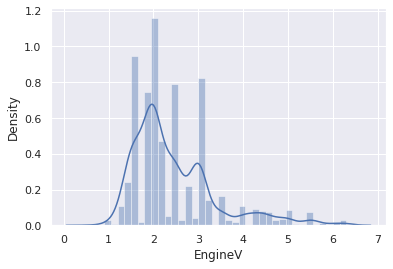

In [21]:
sns.distplot(data_3['EngineV'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


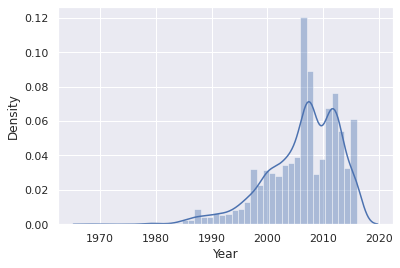

In [22]:
sns.distplot(data_3['Year'])

in year also we have outliers so we have to remove 1% 

In [23]:
q=data_3['Year'].quantile(0.01)
data_4=data_3[data_3['Year']>q]
data_4.describe()

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


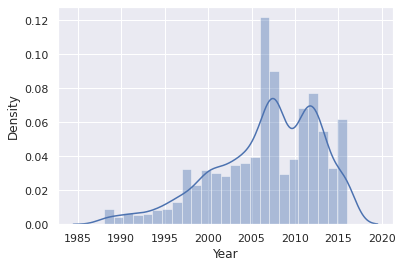

In [24]:
sns.distplot(data_4['Year'])

now we cleaned data

In [25]:
data_cleaned=data_4.reset_index(drop=True)

In [26]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [27]:
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


we finished data cleaning 

The next step to explore and relax some assumptions :
1-linearity 
2-no endogeneity
3-normality and homoscedasticity
4-no auto correlation
5-no multicollinearity

1-check linearity between dependent variable Y and each independent numerical continous variables using scatterplot

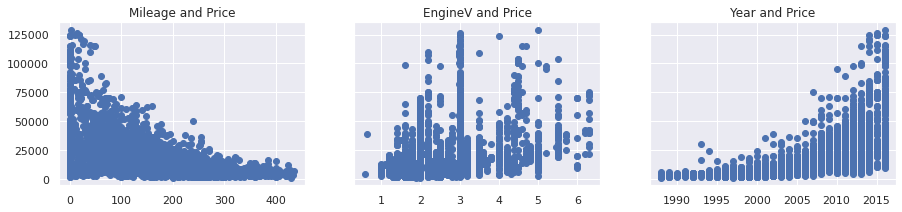

In [30]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax1.set_title('Mileage and Price')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('EngineV and Price')
ax3.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax3.set_title('Year and Price')
plt.show()

as we see no linear one
to solving them we can use 
1- non linear regression
2-transformation into 
  a-exponential transformation 
  b-log transformation

we must change one value by log

check price pdf

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


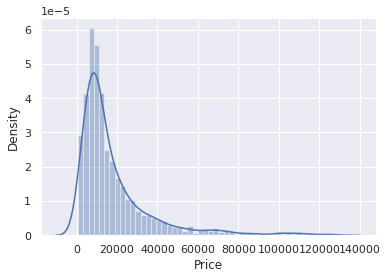

In [31]:
sns.distplot(data_cleaned['Price'])

as we see it is not normal distribution
so its relation with other features not linear

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


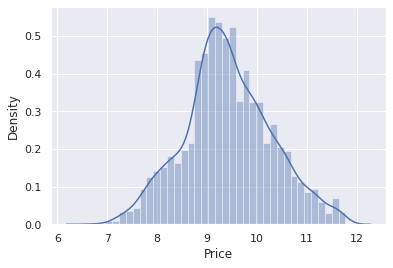

In [33]:
log_price=np.log(data_cleaned['Price'])
sns.distplot(log_price)

now , as we see log_price is normal distribution
=> replace price in dataset with log_price

In [35]:
data_cleaned['Log_Price']=log_price

data_cleaned.describe()

,Price,Mileage,EngineV,Year,Log_Price
count,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853,9.415703
std,19085.855165,95.633291,0.949366,6.103870,0.876616
min,800.000000,0.000000,0.600000,1988.000000,6.684612
25%,7200.000000,91.000000,1.800000,2003.000000,8.881836
50%,11700.000000,157.000000,2.200000,2008.000000,9.367344
75%,21700.000000,225.000000,3.000000,2012.000000,9.985068
max,129222.000000,435.000000,6.300000,2016.000000,11.769287


now , check linearity again

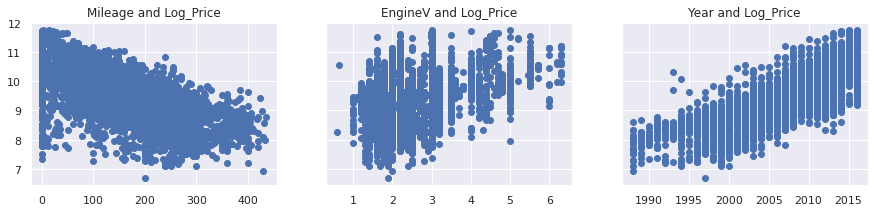

In [37]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Mileage'],data_cleaned['Log_Price'])
ax1.set_title('Mileage and Log_Price')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Log_Price'])
ax2.set_title('EngineV and Log_Price')
ax3.scatter(data_cleaned['Year'],data_cleaned['Log_Price'])
ax3.set_title('Year and Log_Price')
plt.show()

we can see linear pattern in all plots now

now remove price


In [40]:
data_cleaned=data_cleaned.drop(['Price'],axis=1)

In [41]:
data_cleaned.describe()

,Mileage,EngineV,Year,Log_Price
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,160.542539,2.450440,2006.709853,9.415703
std,95.633291,0.949366,6.103870,0.876616
min,0.000000,0.600000,1988.000000,6.684612
25%,91.000000,1.800000,2003.000000,8.881836
50%,157.000000,2.200000,2008.000000,9.367344
75%,225.000000,3.000000,2012.000000,9.985068
max,435.000000,6.300000,2016.000000,11.769287
